## The Secant Method ##
The secant method is a numerical root-finder that approximates a function's roots from two initial guess points. It works by first finding f(x0) and f(x1) where x0 and x1 are the two guess points and f(x) is the function to be solved. Then, we connect the two points on the graph to form a **secant** that crosses the x-axis at some point x2. x2 can be calculated from x0 and x1 using the following formula...
$$ x_2= x_1 -f(x_1)*(\frac{x_1-x_0}{f(x_1)-f(x_0)})$$
We then repeat for x1 and x2 by finding x3 and so on. The formula for the x-intercept at nth iteration is
$$ x_n= x_{n-1} -f(x_{n-1})*(\frac{x_{n-1}-x_{n-2}}{f(x_{n-1})-f(x_{n-2})})$$

In [72]:
def secant(f, x0, x1, e=5, max_iter=10):
    max_iter-=1
    x_next= x1- f(x1)*(x1-x0)/(f(x1)-f(x0))
    error= abs((x_next-x1)/x_next)*100
    print(f"Intercept {x_next}", f"error:{error}")
    if max_iter==0 or error<=e:
        print(f"Approximate root:{x_next}",end=' ')
        print(f"Error:{error}")
        return x_next
    secant(f, x1, x_next, e=5, max_iter=10)    

In [73]:
f= lambda d: 16*d**2.5 + 20000*d**2 -931.95*d -400.74
secant(f, 3, 1)

Intercept 0.7640542125460653 error:30.8807652100615
Intercept 0.45660160641542624 error:67.33498126393184
Intercept 0.3142344086672767 error:45.30604982183645
Intercept 0.22577529858428885 error:39.18015417880771
Intercept 0.18438061258016789 error:22.450671697450154
Intercept 0.16959217013994576 error:8.720003068549007
Intercept 0.16688861545092182 error:1.619975503852748
Approximate root:0.16688861545092182 Error:1.619975503852748


### Visualization using Matplotlib

In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

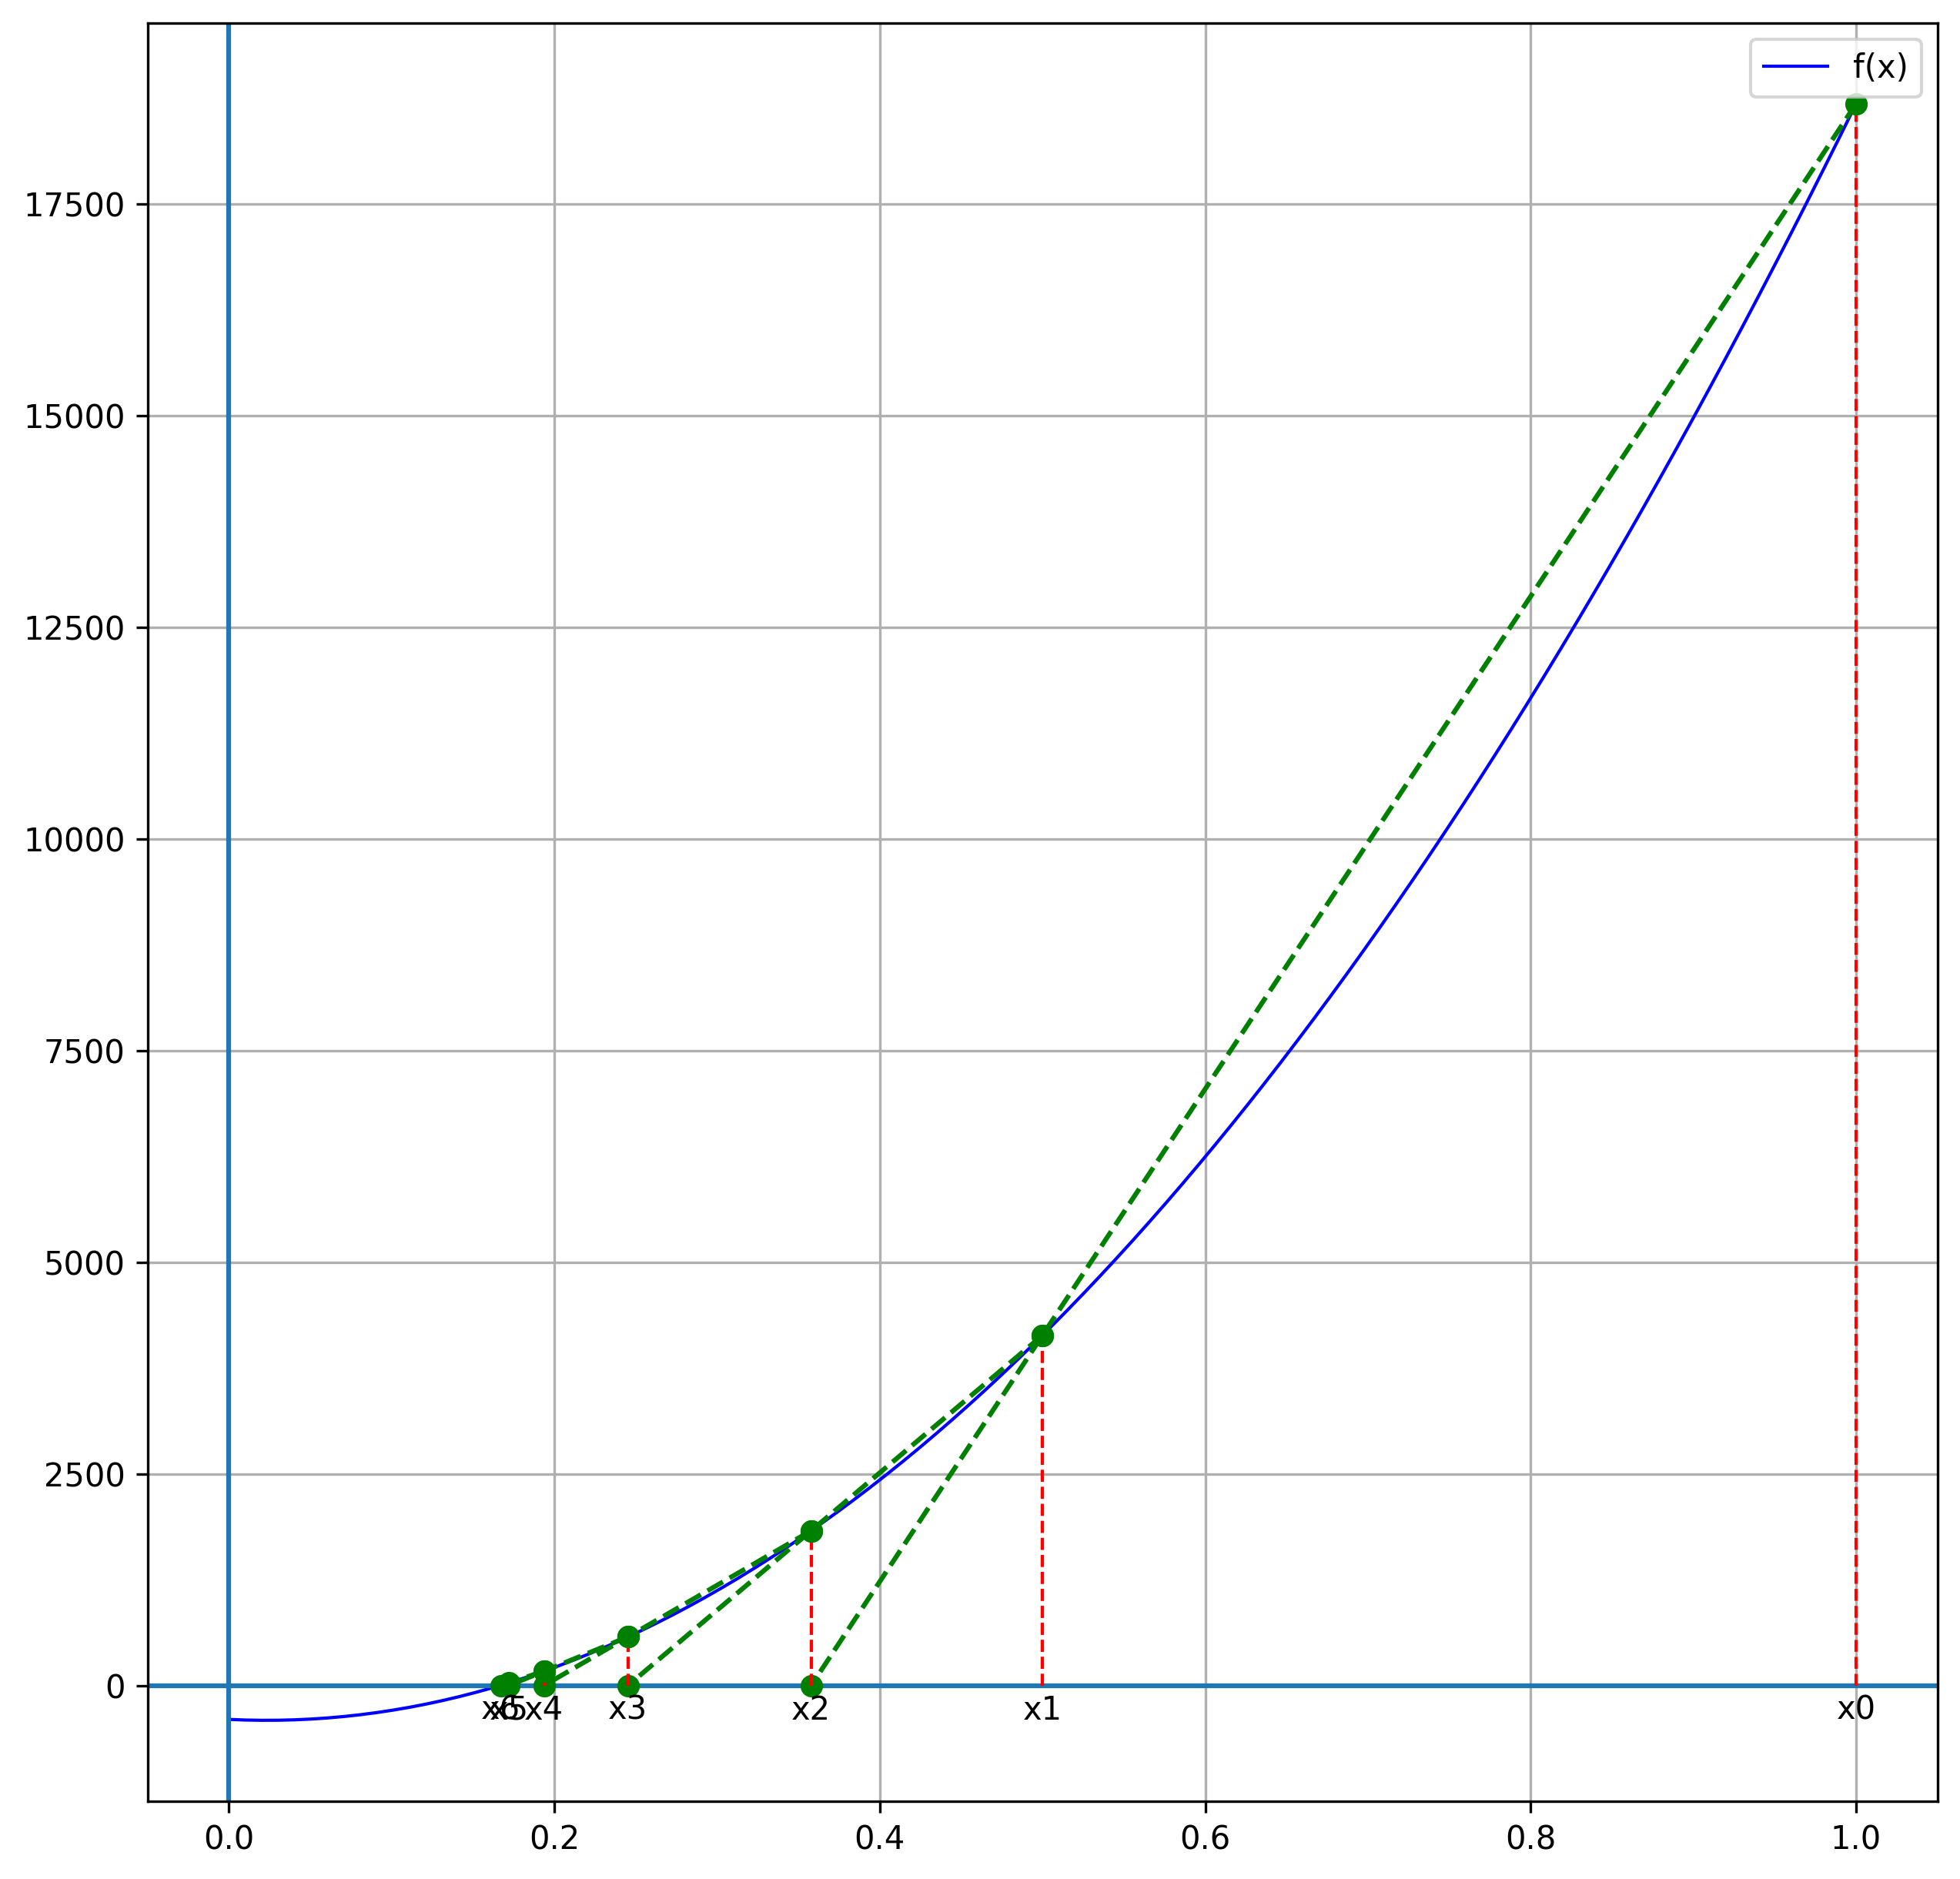

In [83]:
x= np.linspace(0, 1, 100)
fig, ax= plt.subplots(figsize= (10,10), dpi=300)
plt.plot(x, f(x), 'b-', label= 'f(x)', lw= 1.0)
ax.axhline(0, -5,5)
ax.axvline(0, -5,5)
plt.grid(True)
x0=1 # initial values here are different from those used in the function, just for demo 
x1=0.5
plt.text(x0, -400, 'x0', horizontalalignment='center', fontsize=10) 
plt.text(x1, -400, 'x1', horizontalalignment='center', fontsize=10)
x=[]
for i in range(5):
    x= (x1- f(x1)*(x1-x0)/(f(x1)-f(x0)))
    plt.vlines([x0, x1], [0 ,0], [f(x0), f(x1)], colors='red', ls= '--', lw=1.0)
    #plt.plot([x0, x1, x], [f(x0), f(x1), 0], 'ko')  # Black dots at the points
    plt.plot([x0, x1, x], [f(x0), f(x1), 0],'o--', color='green') #connecting line
    # Add labels below the x-intercepts
    plt.text(x, -400, f'x{i+2}', horizontalalignment='center', fontsize=10)  # where i is iteration number
    x0= x1
    x1= x
plt.legend()
plt.show()

You can clearly see from the above plot how the secant method works geometrically. You can also see the intercepts converging to the root near 0.2, which is also the value we get from the previous function.